Long-term performance analysis

This analysis provides a clear 20-year perspective on global equity performance, highlighting the importance of sector and geographic allocation in portfolio construction.

---


## **Analysis Overview**
**Timeframe**: 2004-2024 (20 years)
**Indices Analyzed**: 8 major global indices across US, Europe, and Asia
**Methodology**: Normalized cumulative returns (base = 1.0 in 2004) with comparative performance metrics

\

**Performance Ranking (2004-2024)**
   - Top Performers:
     * BSE Sensex (India): ~1,134% return
     * Nasdaq Composite: ~1,100% return
   - Moderate Performers:
     * S&P 500: ~362%
     * Nifty 50: ~404%
     * DAX: ~351%
   - Lagging Indices:
     * FTSE 100: ~81%
     * CAC 40: ~125%

**Regional Insights**
   - **US Markets**: Tech-driven Nasdaq outperformed broader indices (3x S&P 500 returns)
   - **India**: Exceptional growth with both Sensex and Nifty in top performers
   - **Europe**: Consistently underperformed (DAX best at 351%, FTSE worst at 81%)

**Market Characteristics**
   - Constituent count inversely correlated with returns:
     * Narrow indices (Nasdaq 100, Sensex 30) outperformed broad ones (S&P 500)
   - Trading volume:
     * US indices dominated liquidity (S&P 500: 3.78B avg daily volume)
     * European indices showed lower liquidity

**Historical Patterns**
   - All indices showed:
     * Sharp dips during 2008 Financial Crisis
     * Strong COVID rebound (2020-2021)
     * Recent volatility (2022-2024 inflation period)
   - Tech-heavy indices demonstrated most volatility but highest returns

**Highlights from Visualizations**
* Cumulative Return Plot:
   - Clear divergence between emerging (India) and developed markets
   - Accelerated growth post-2016 for tech indices

* Bar Chart:
   - Visual confirmation of India's outperformance
   - Relative underperformance of European markets

\

**Sector Matters**: Tech dominance drove US outperformance

**Market Breadth**: Narrower indices generally performed better

**Emerging vs Developed**: India's growth story validated by market performance

**Liquidity-Return Tradeoff**: Highest volume indices (US) didn't deliver highest returns

**Implications**
- Long-term investors benefited most from:
  * Tech exposure (Nasdaq)
  * Emerging market allocation (India)
  * Avoiding European large-cap focus
- Index construction methodology significantly impacts returns
- Recent trends suggest continued tech/emerging market leadership



In [ ]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings("ignore")


**Cumulative return of major global stock indices** from 2004 to 2024, with all indices **normalized to a base value of 1 in 2004**

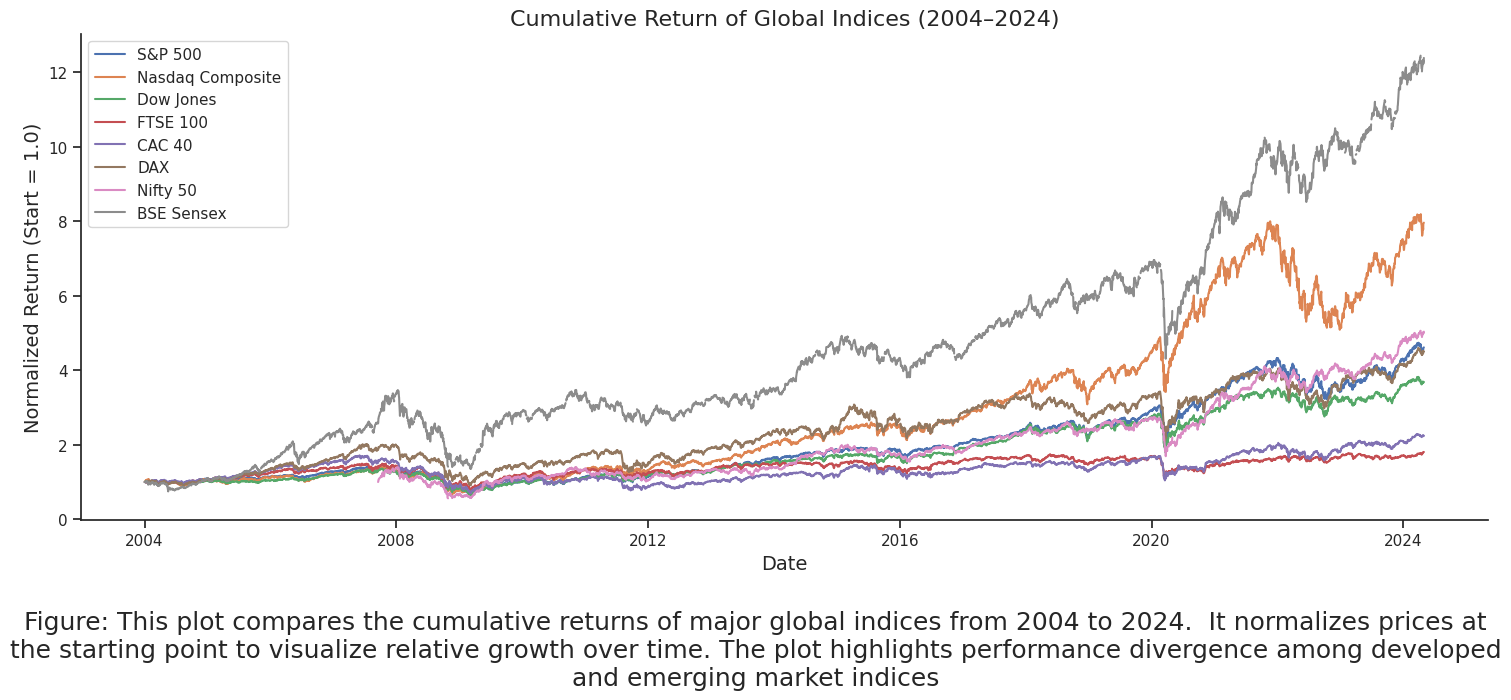

In [ ]:

# Define indices and date range
indices = ['^GSPC', '^IXIC', '^DJI', '^FTSE', '^FCHI', '^GDAXI', '^NSEI', '^BSESN']
start = '2004-01-01'
end = '2024-04-30'

# Metadata for display
index_metadata = {
    '^GSPC': 'S&P 500',
    '^IXIC': 'Nasdaq Composite',
    '^DJI': 'Dow Jones',
    '^FTSE': 'FTSE 100',
    '^FCHI': 'CAC 40',
    '^GDAXI': 'DAX',
    '^NSEI': 'Nifty 50',
    '^BSESN': 'BSE Sensex'
}

# DataFrame to hold normalized prices
returns_df = pd.DataFrame()

for ticker in indices:
    data = yf.download(ticker, start=start, end=end, progress=False)['Close']
    if data.empty:
        continue
    name = index_metadata[ticker]
    cumulative_return = data / data.iloc[0]  # Normalize to 1
    returns_df[name] = cumulative_return

plt.figure(figsize=(15, 6))

for column in returns_df.columns:
    plt.plot(returns_df.index, returns_df[column], label=column)

plt.title("Cumulative Return of Global Indices (2004–2024)", fontsize=16)
plt.xlabel("Date", fontsize=14)
plt.ylabel("Normalized Return (Start = 1.0)", fontsize=14)
plt.legend()

# Remove grid lines
plt.grid(False)

# Keep only bottom and left spines
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')

plt.tight_layout()
plt.figtext(
    0.5, -0.15,
    "Figure: This plot compares the cumulative returns of major global indices from 2004 to 2024.  It normalizes prices at the starting point to visualize relative growth over time. The plot highlights performance divergence among developed and emerging market indices",
    wrap=True, horizontalalignment='center', fontsize=18
)
plt.show()


In [ ]:

# Corresponding names and constituent counts
index_metadata = {
    '^GSPC': ('S&P 500', 'USA', 500),
    '^IXIC': ('Nasdaq Composite', 'USA', 100),
    '^DJI': ('Dow Jones', 'USA', 30),
    '^FTSE': ('FTSE 100', 'UK', 100),
    '^FCHI': ('CAC 40', 'France', 40),
    '^GDAXI': ('DAX', 'Germany', 40),
    '^NSEI': ('Nifty 50', 'India', 50),
    '^BSESN': ('BSE Sensex', 'India', 30)
}

results = []

# Fetch and process data
for ticker in indices:
    data = yf.download(ticker, start=start, end=end, progress=False)

    if data.empty:
        continue

    start_price = data['Close'].iloc[0]
    end_price = data['Close'].iloc[-1]
    cumulative_return = float(((end_price - start_price) / start_price) * 100)
    avg_volume = float(data['Volume'].mean() / 10_000_000)

    name, country, constituents = index_metadata[ticker]
    results.append({
        "Name": name,
        "Country": country,
        "Constituent Count": constituents,
        "20Y Cumulative Return (%)": round(cumulative_return, 2),
        "Avg. Daily Volume (x10M shares)": round(avg_volume, 2)
    })

# Convert to DataFrame
df_index_summary = pd.DataFrame(results)
df_index_summary.sort_values("20Y Cumulative Return (%)", ascending=False, inplace=True)
df_index_summary.reset_index(drop=True, inplace=True)

df_index_summary



,Name,Country,Constituent Count,20Y Cumulative Return (%),Avg. Daily Volume (x10M shares)
0,BSE Sensex,India,30,1139.03,0.01
1,Nasdaq Composite,USA,100,696.49,257.73
2,Nifty 50,India,50,403.79,0.02
3,S&P 500,USA,500,361.55,374.11
4,DAX,Germany,40,350.87,10.74
5,Dow Jones,USA,30,268.75,24.58
6,CAC 40,France,40,124.23,10.70
7,FTSE 100,UK,100,80.63,102.07


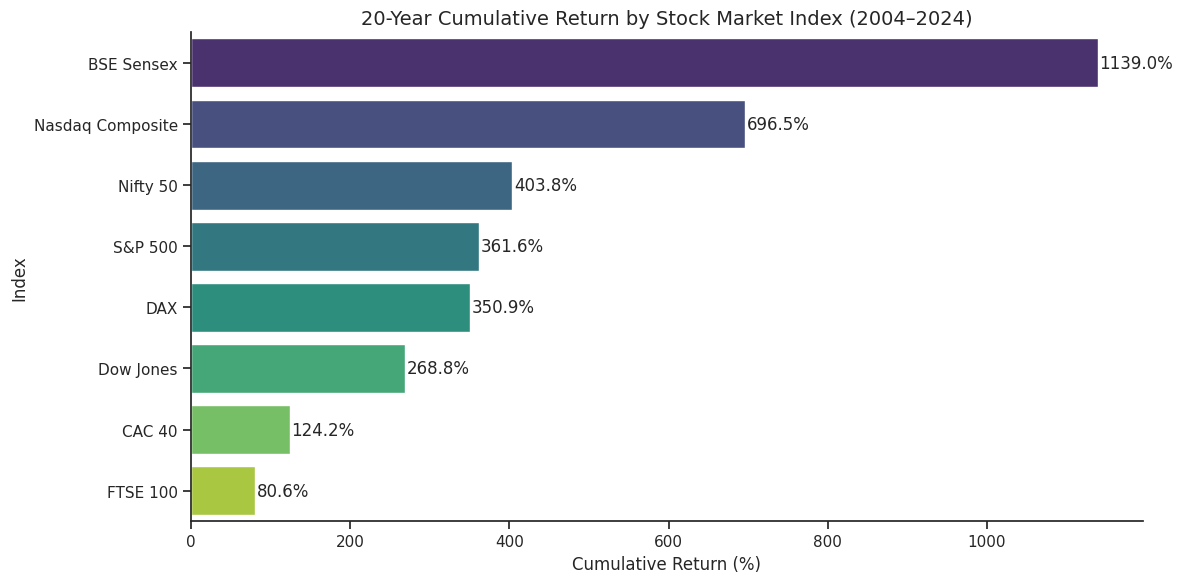

In [ ]:

# Set plot style without grid
sns.set(style="white")

plt.figure(figsize=(12, 6))

# Create barplot
sns.barplot(
    x="20Y Cumulative Return (%)",
    y="Name",
    data=df_index_summary,
    palette="viridis"
)

# Annotate values
for i, row in df_index_summary.iterrows():
    plt.text(
        row["20Y Cumulative Return (%)"] + 2,  # offset to the right
        i,
        f'{row["20Y Cumulative Return (%)"]:.1f}%',
        va='center'
    )

# Remove top and right spines, keep only bottom and left
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')

# Titles and labels
plt.title("20-Year Cumulative Return by Stock Market Index (2004–2024)", fontsize=14)
plt.xlabel("Cumulative Return (%)")
plt.ylabel("Index")

plt.tight_layout()
plt.show()
